<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Fuzzy_My_own_example_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

from ipywidgets import IntSlider
from ipywidgets import HTML

In [ ]:
slider = IntSlider(value=50)
slider

IntSlider(value=50)

In [ ]:
slider2 = IntSlider(value=30)
slider2

IntSlider(value=30)

In [ ]:
text = HTML("The silder value is <b>{}</b>".format(slider.value))

text

HTML(value='The silder value is <b>50</b>')

In [ ]:
text2 = HTML("The silder 2 value is <b>{}</b>".format(slider2.value))

text2

HTML(value='The silder 2 value is <b>30</b>')

In [ ]:
def update_html(change):
  text.value = "The slider value is <b>{}</b>".format(slider.value)
  text2.value = "The slider value is <i>{}</i>".format(slider2.value)

def function():
  print(slider2.value * 20)

# Execute callback whenever the slider value is changed
slider.observe(update_html, 'value')
slider2.observe(update_html, 'value')

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(x):
    print(x)
    return x

def z(x, y):
  print(x, y)
  return x, y

In [ ]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [ ]:
interact(z, x=10, y=20)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=20, description='…

<function __main__.z>

In [ ]:
def fuzzyDemo(x, y):
  print(x, y)
  return(x, y)

In [ ]:
interact(fuzzyDemo, x=20, y=30)

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), IntSlider(value=30, description='…

<function __main__.fuzzyDemo>

In [ ]:
x1 = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'x1')

x2 = ctrl.Antecedent(np.arange(0, 7.1, 0.1), 'x2')

y  = ctrl.Consequent(np.arange(0, 7.1, 0.1), 'y')

No handles with labels found to put in legend.


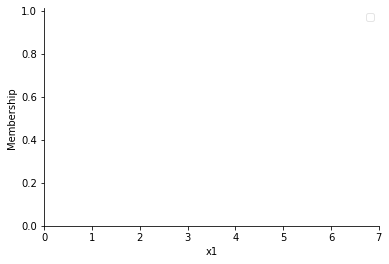

In [ ]:
x1.view()

In [ ]:
x1.universe

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [ ]:
x1['low'] = fuzzy.trimf(x1.universe, [1.0, 2.5, 4])

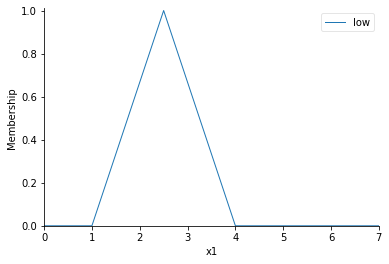

In [ ]:
x1.view()

In [ ]:
x1['high'] = fuzzy.trimf(x1.universe, [2.0, 3.5, 5.0])

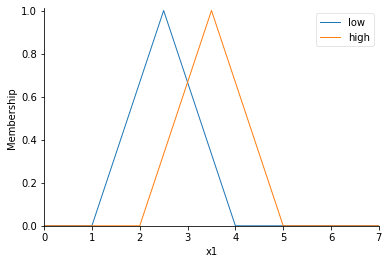

In [ ]:
x1.view()

In [ ]:
x1.defuzzify_method = 'centroid'      # Center of Gravity

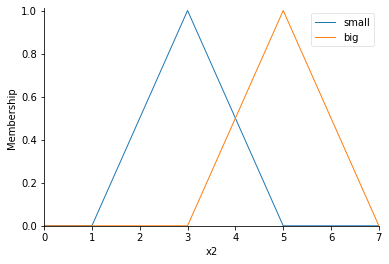

In [ ]:
x2['small'] = fuzzy.trimf(x2.universe, [1.0, 3.0, 5.0])
x2['big']   = fuzzy.trimf(x2.universe, [3.0, 5.0, 7.0])

x2.view()

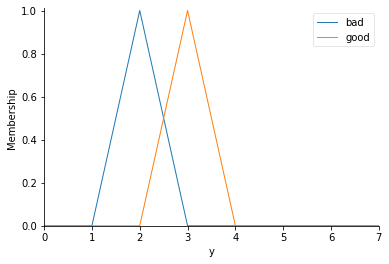

In [ ]:
y['bad']  = fuzzy.trimf(y.universe, [1.0, 2.0, 3.0])
y['good'] = fuzzy.trimf(y.universe, [2.0, 3.0, 4.0])

y.view()

In [ ]:
def setRules(np_type = 'fmin'):

  if( np_type == 'multiply'):
    n = np.multiply
  elif( np_type == 'fmin'):
    n = np.fmin
  elif( np_type == 'fmax'):
    n = np.fmax
  
  rule1 = ctrl.Rule(antecedent = x1['low'] & x2['small'], consequent = y['bad'], and_func = n)
  rule2 = ctrl.Rule(antecedent = x1['high'] & x2['big'], consequent = y['good'], and_func = n)

  return rule1, rule2

In [ ]:

def fuzzyDemo(input1 = 3.0, input2 = 4.0, Type = ['fmax','fmin', 'multiply']):

  rule1, rule2 = setRules('fmax')

  rule1, rule2 = setRules(Type)

  print(rule1)
  print(rule2)

  system = ctrl.ControlSystem([rule1, rule2])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['x1'] = input1
  simulation.input['x2'] = input2

  simulation.compute()

  print('----------------------------')
  print('y  :', simulation.output['y'])
  print('----------------------------')
  print(simulation.input)

  y.view(sim = simulation)
  x1.view(sim = simulation)
  x2.view(sim = simulation)
 
  # return(input1, input2)
  

In [ ]:
interact(fuzzyDemo, input1=(0.0,7.0), input2=(0.0,7.0), np = ['fmax','fmin', 'multiply'])

interactive(children=(FloatSlider(value=3.0, description='input1', max=7.0), FloatSlider(value=4.0, descriptio…

<function __main__.fuzzyDemo>